<a href="https://colab.research.google.com/github/luizdalla/myfinance/blob/main/01_general_market_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Environment setup and imports

In [ ]:
!pip install yfinance=='0.1.74' -q
!pip install investpy=='1.0.8' -q

In [ ]:
import pandas as pd
import seaborn as sns; 
sns.set()
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)
import yfinance as yf
import investpy as inv
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime

## Time interval configuration

In [ ]:
start = '01/01/2000'
end = datetime.datetime.today().strftime('%d/%m/%Y')
interval='Monthly'

## Commodities Data

In [ ]:
# commodities
# inv.commodities.get_commodities()
# inv.commodities.search_commodities(by='name', value='gold')
gold = inv.commodities.get_commodity_historical_data('Gold', start, end)
silver = inv.commodities.get_commodity_historical_data('Silver', start, end)
oil = inv.commodities.get_commodity_historical_data('Brent Oil', start, end)

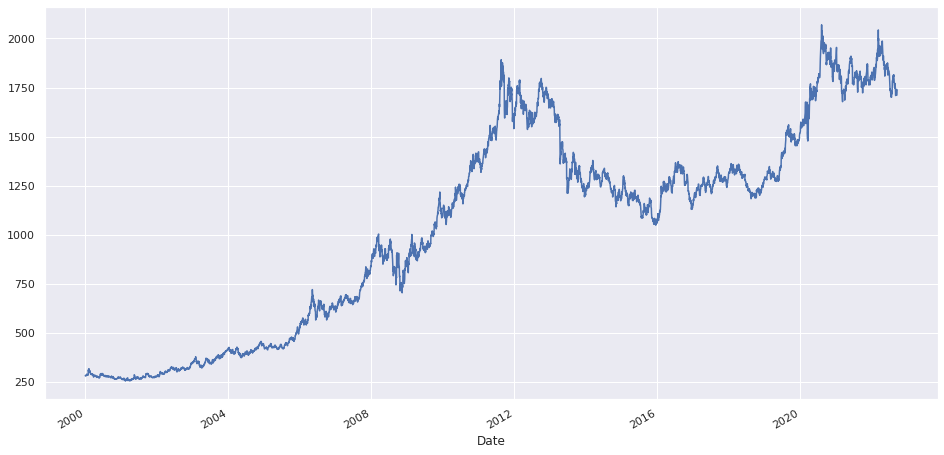

In [ ]:
gold['Close'].plot();

## Index Data

In [ ]:
# indices
# inv.indices.get_indices_overview('united states')
ibov = inv.indices.get_index_historical_data('Bovespa','brazil',start,end)
sp500 = inv.indices.get_index_historical_data('S&P 500','united states',start,end)

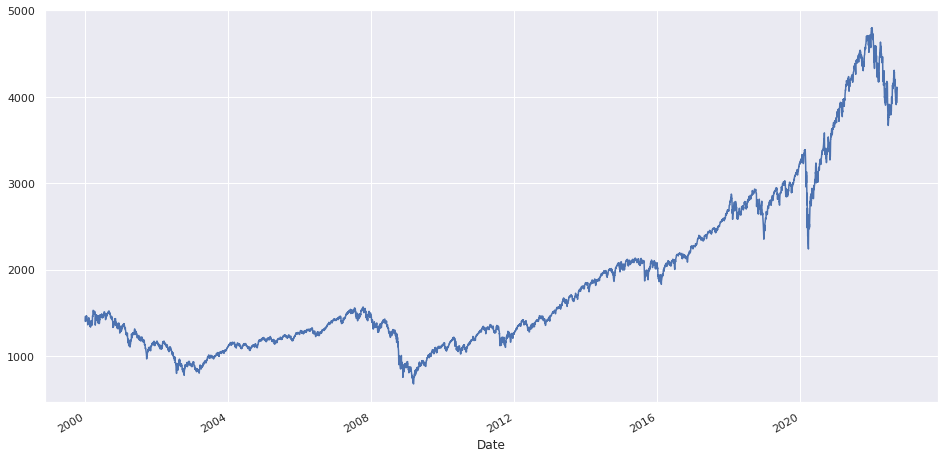

In [ ]:
sp500['Close'].plot();

## Currency Data

In [ ]:
# currency
# inv.currency_crosses.get_available_currencies()
# currency_cross = inv.currency_crosses.get_currency_crosses()
# inv.currency_crosses.get_currency_cross_information('BRLUSD')
# currency_cross[(currency_cross['base']=='BRL') & (currency_cross['second']=='USD')]
dolar = inv.currency_crosses.get_currency_cross_historical_data('USD/BRL', start, end)
euro = inv.currency_crosses.get_currency_cross_historical_data('EUR/BRL', start, end)
euro_dolar = inv.currency_crosses.get_currency_cross_historical_data('EUR/USD', start, end)

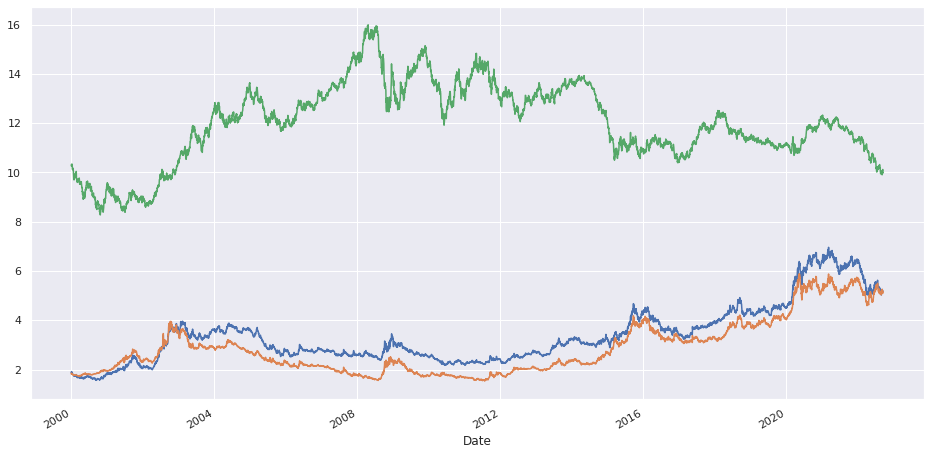

In [ ]:
euro['Close'].plot();
dolar['Close'].plot();
(euro_dolar['Close']*10).plot();

## Brazilian Funds

In [ ]:
fundos_br = inv.get_funds_list(country='brazil')
fundos_br[:5]

['Fundo De Investimento Multimercado Bordeaux Iv Crédito Privado Investimento No Exterior',
 'Cshg Warrior V Fundo De Investimento Multimercado - Crédito Privado Investimento No Exterior',
 'A3 Viking Fi Em Quotas De Fi Multimercado Crédito Privado Investimento No Exterior',
 'Bb Espelho Multimercado Lp J. Safra Absoluto 30 Private Fic Fi',
 'Ctm Hedge Fundo De Investimento Multimercado - Longo Prazo']

In [ ]:
len(fundos_br)

5200

In [ ]:
# pesq = inv.search_funds(by='name', value='alaska black')
# pesq = inv.search_funds(by='name', value='BNP Paribas Small')
# pesq = inv.search_funds(by='name', value='Tavola')
# pesq = inv.search_funds(by='name', value='BTG Pactual Dolar')
# pesq[pesq['country']=='brazil']
pesq = inv.search_funds(by='name', value='Bolsa')
pesq[pesq['country']=='brazil']

,country,name,symbol,issuer,isin,asset_class,currency,underlying
0,brazil,Bradesco H Fundo De Investimento Multimercado ...,0P000136QZ,BRAM – Bradesco Asset Management SA DTVM,BRBLS3CTF002,other,BRL,
1,brazil,órama Bolsa Mid Large Small Cap Fundo De Inves...,0P0000V1XS,Órama DTVM SA,BRBOL3CTF006,equity,BRL,
2,brazil,ágora Bolsa Fundo De Investimento Em Cotas De ...,0P0000U47A,BRAM – Bradesco Asset Management SA DTVM,BRAGO2CTF006,equity,BRL,


In [ ]:
alaska_ = 'Alaska Black Fundo De Investimento Em Cotas De Fundos De Investimento Em Ações - Bdr Nível I'
bnp_ = 'Bnp Paribas Small Caps Fundo De Investimento Ações'
tavola_ = 'Tavola Absoluto Fundo De Investimento Multimercado'
btg_ = 'Btg Pactual Dolar Fundo De Investimento Cambial'
votorantim_ = 'Votorantim Fundo De Investimento Em Cotas De Fundos De Investimento Cambial Dolar'

alaska = inv.get_fund_historical_data(alaska_, country='brazil', from_date='01/01/1900', to_date='11/11/2021')
bnp = inv.get_fund_historical_data(bnp_, country='brazil', from_date='01/01/1900', to_date='11/11/2021')
tavola = inv.get_fund_historical_data(tavola_, country='brazil', from_date='01/01/1900', to_date='11/11/2021')
btg = inv.get_fund_historical_data(btg_, country='brazil', from_date='01/01/1900', to_date='11/11/2021')
votorantim = inv.get_fund_historical_data(btg_, country='brazil', from_date='01/01/1900', to_date='11/11/2021')

In [ ]:
fig = make_subplots(rows=7, cols=1)
fig.append_trace(go.Scatter(x=alaska.index, y=alaska['Close'],
                    mode='lines',
                    name='alaska'), row=1, col=1)
fig.append_trace(go.Scatter(x=bnp.index, y=bnp['Close'],
                    mode='lines',
                    name='BNP'), row=2, col=1)
fig.append_trace(go.Scatter(x=tavola.index, y=tavola['Close']*10,
                    mode='lines', 
                    name='Tavola'), row=3, col=1)
fig.append_trace(go.Scatter(x=btg.index, y=btg['Close']*1000,
                    mode='lines', 
                    name='BTG'), row=4, col=1)
fig.append_trace(go.Scatter(x=votorantim.index, y=votorantim['Close']*100,
                    mode='lines', 
                    name='Votora'), row=5, col=1)
fig.append_trace(go.Scatter(x=dolar.index, y=dolar['Close'],
                    mode='lines', 
                    name='dolar'), row=6, col=1)
fig.append_trace(go.Scatter(x=ibov.index, y=ibov['Close'],
                    mode='lines',
                    name='IBOV/10'), row=7, col=1)
fig.update_layout(height=1200, title_text="Stacked Subplots")
fig.show()

## Comparison Commodities, Index, Currencies

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ibov.index, y=ibov['Close']/10,
                    mode='lines',
                    name='IBOV/10'))
fig.add_trace(go.Scatter(x=sp500.index, y=sp500['Close']*10,
                    mode='lines',
                    name='S&P500'))
fig.add_trace(go.Scatter(x=gold.index, y=gold['Close']*10,
                    mode='lines', 
                    name='Gold*10'))
fig.add_trace(go.Scatter(x=silver.index, y=silver['Close']*1000,
                    mode='lines', 
                    name='silver*100'))
fig.add_trace(go.Scatter(x=oil.index, y=oil['Close']*100,
                    mode='lines', 
                    name='oil*100'))
fig.add_trace(go.Scatter(x=dolar.index, y=dolar['Close']*10000,
                    mode='lines', 
                    name='dolar'))

fig.show()

## Economy Data - Brazil

In [ ]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

In [ ]:
ipca = consulta_bc(433)
igpm = consulta_bc(189)
selic_meta = consulta_bc(432)
reservas_internacionais = consulta_bc(13621)
pnad = consulta_bc(24369)
cdi = consulta_bc(12)

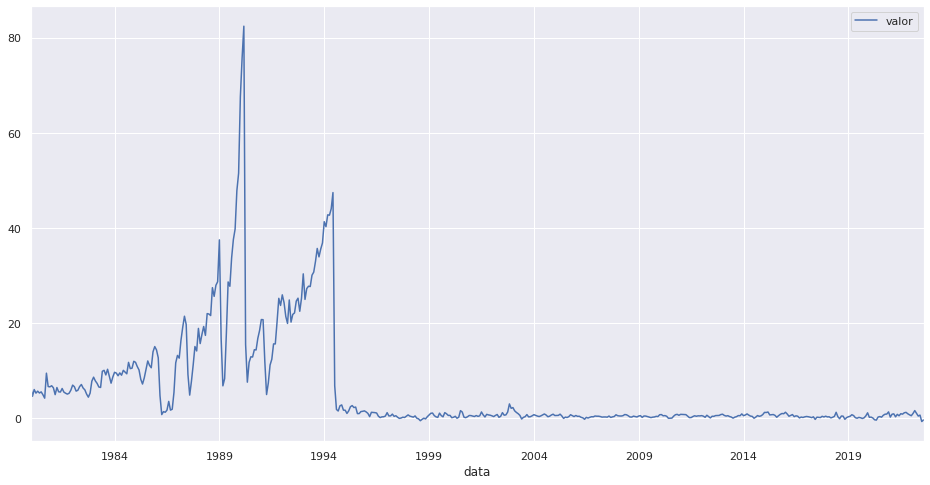

In [ ]:
ipca.plot();
# 1989 :(

## Calculating Returns

In [ ]:
data_inicio = '2020-01-01'
ibov_retorno = ibov['Close'].pct_change()
ibov_retorno_acumulado = (1 + ibov_retorno[ibov_retorno.index >= data_inicio]).cumprod()
ibov_retorno_acumulado.iloc[0] = 1

selic_meta_acumulado = (1 + selic_meta[selic_meta.index >= data_inicio] / 100).cumprod()
selic_meta_acumulado.iloc[0] = 1

cdi_acumulado = (1 + cdi[cdi.index >= data_inicio] / 100).cumprod()
cdi_acumulado.iloc[0] = 1

ipca_acumulado = (1 + ipca[ipca.index >= data_inicio] / 100).cumprod()
ipca_acumulado.iloc[0] = 1

dolar_retorno = dolar['Close'].pct_change()
dolar_retorno_acumulado = (1 + dolar_retorno[dolar_retorno.index >= data_inicio]).cumprod()
dolar_retorno_acumulado.iloc[0] = 1

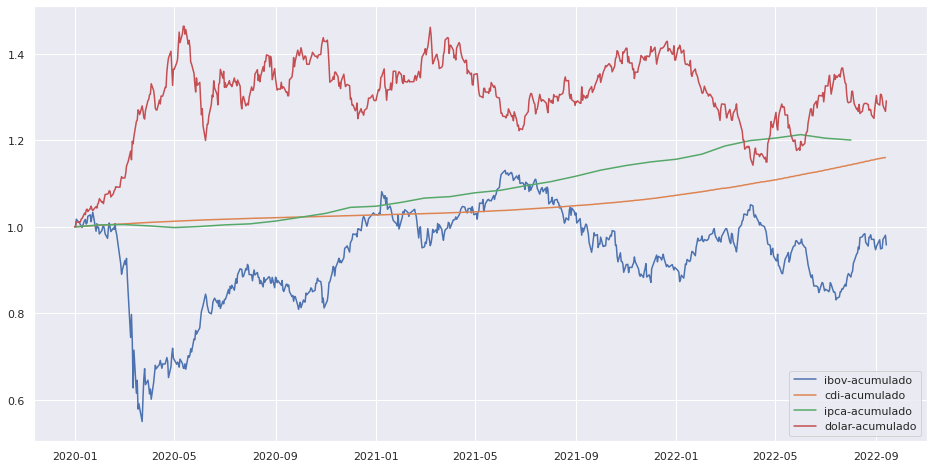

In [ ]:
fig, ax = plt.subplots()
ax.plot(ibov_retorno_acumulado, label = 'ibov-acumulado')
ax.plot(cdi_acumulado, label = 'cdi-acumulado');
ax.plot(ipca_acumulado, label = 'ipca-acumulado');
ax.plot(dolar_retorno_acumulado, label = 'dolar-acumulado');
ax.legend();

## Exploring Economy Data

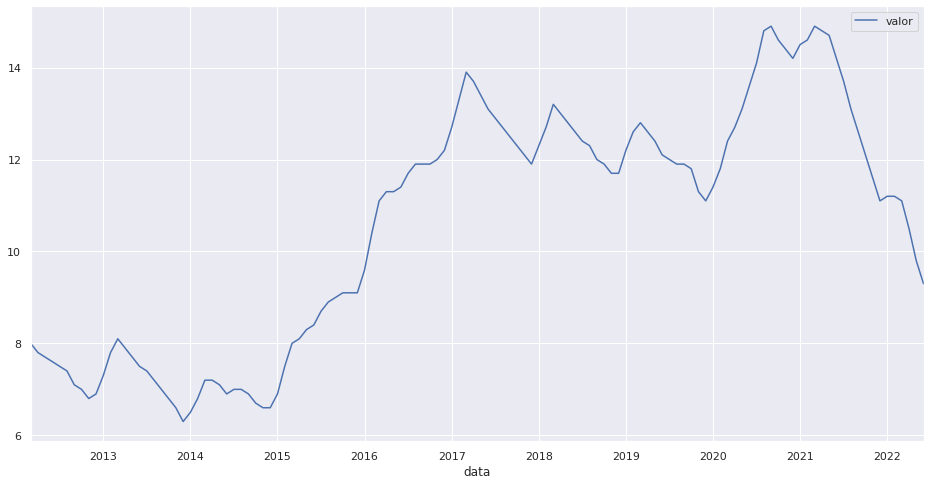

In [ ]:
pnad.plot();

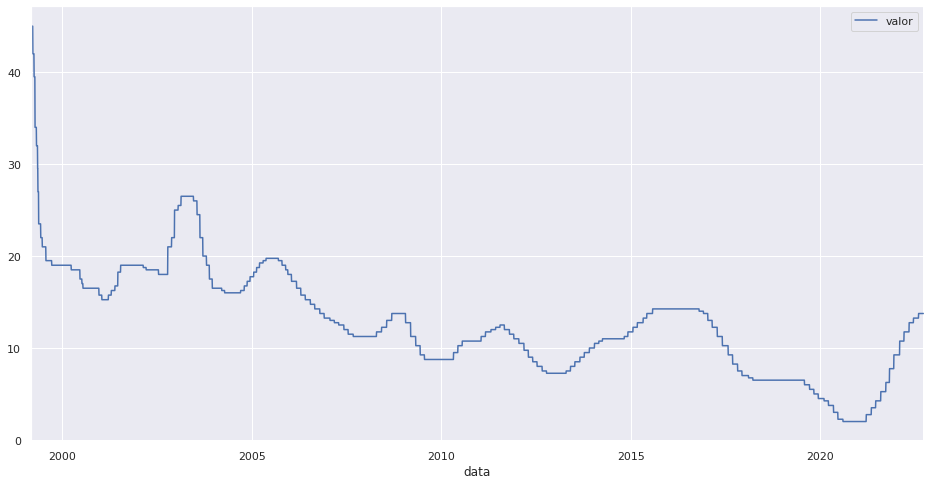

In [ ]:
selic_meta.plot();